# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework #3
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Thursday, Febrary 16th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Optimization via Descent

Suppose you are building a pricing model for laying down telecom cables over a geographical region. Your model takes as input a pair of  coordinates, $(x, y)$, and contains two parameters, $\lambda_1, \lambda_2$. Given a coordinate, $(x, y)$, and model parameters, the loss in revenue corresponding to the price model at location $(x, y)$ is described by
$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x - 0.0005\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$
Read the data contained in `HW3_data.csv`. This is a set of coordinates configured on the curve $y^2 - x^2 = -0.1$. Given the data, find parameters $\lambda_1, \lambda_2$ that minimize the net loss over the entire dataset.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

x, y = np.genfromtxt('HW3_data.csv', delimiter=',')

In [3]:
x_sum = x.sum()
y_sum = y.sum()
n = len(x)

L = lambda l1, l2, x, y: 0.000045 * l2**2 * y.sum() - 0.000098 * l1**2 * x.sum() + 0.003926 * x.sum() * l1 * np.exp(-0.1 * (l1**2 + l2**2))

print 'the min total cost', L(2.05384, 0, x, y)

the min total cost -9.9341040253


Note min total cose is the "same" (up to a constant) as min average cost since our data is fixed!

In [4]:
print 'total cost closed form: {} * l2^2 - ({}) * l1^2 + {} * l1 * e^(-0.1(l1^2 + l2^2))'.format(0.000045 * y_sum, 0.000098 * x_sum, 0.003926 * x_sum)

total cost closed form: 0.199738674533 * l2^2 - (-0.1997025438) * l1^2 + -8.00032843835 * l1 * e^(-0.1(l1^2 + l2^2))


Put this total cost function into Wolfram if needed to get global min and gradient!

In [7]:
#the gradient!!
grad = lambda l1, l2, x, y: np.array([-0.000098 * 2 * l1 * x.sum() + 0.003926 *  x.sum() * np.exp(-0.1 * (l1**2 + l2**2)) - 0.003926 * 2 * 0.1 *  x.sum() * l1**2 * np.exp(-0.1 * (l1**2 + l2**2)), 2 * 0.000045 * l2 * y.sum() - 0.1 * 2* 0.003926 *  x.sum() * l1 * l2 * np.exp(-0.1 * (l1**2 + l2**2))])

You can literally copy and paste rahul's lecture code and change the gradient line!!

***NOTE: YOU SHOULD DO DESCENT USING MEAN COST FUNCTION SO WE CAN COMPARE WITH SGD LATER!!!!***

In [5]:
#literally code from Rahul's lecture
def gradient_descent(x, y, theta_init, step=0.01, maxsteps=0, precision=0.001):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
   
    counter = 0
    oldcost = 0

    currentcost = L(theta[0], theta[1], x, y)

    costs.append(currentcost)
    history.append(np.array([0, 0]))
    history.append(theta)
    
    counter+=1
    while np.linalg.norm(history[-1] - np.array([2.05384, 0])) > precision:
        oldcost=currentcost
        gradient = grad(theta[0], theta[1], x, y)
        theta = theta - 1000./ len(x) * step * gradient  #I'M SCALING THE MEAN LOST FUNCTION GRADIENT BY FACTOR OF 1000
        history.append(theta)
        
        currentcost = L(theta[0], theta[1], x, y)
        costs.append(currentcost)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, counter

how many iters:  4357
final cost: -9.93410274893
precision to actual param: 0.00099973358973


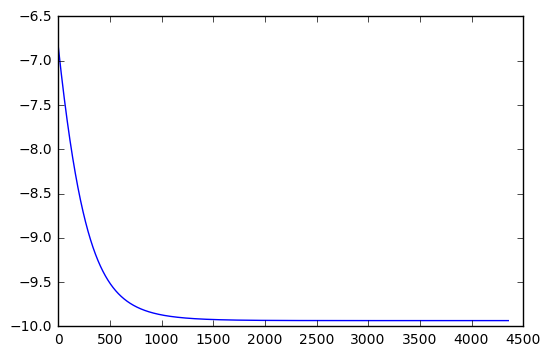

In [9]:
#theta_i = [-15, 40] + np.random.rand(2)
#theta_i = [-5, 2]
#theta_i = [15, 16]
#theta_i = [2, 0.5]
theta_i = [3, -1]
history, cost, iters = gradient_descent(x, y, theta_i, maxsteps=6000)
theta = history[-1]
print 'how many iters: ', iters
print 'final cost:', cost[-1]
print 'precision to actual param:', np.linalg.norm(theta - [2.05384, 0])

plt.plot(range(len(cost)), cost);

***Yay that worked!!!***

Again, literally the code is copy and pasted from Rahul's lecture with like one line changed!!!!

In [21]:
#RAHUL's CODE FROM LECTURE

def sgd(x, y, theta_init, step=100, maxsteps=0, precision=0.001):
    costs = []
    m = len(x) # number of data points
    oldtheta = [1000, 1000]
    theta = theta_init
    history = [] # to store all thetas
    grads=[]
    counter = 0
    oldcost = 0
    epoch = 0
    i = 0 #index

    gradient = grad(theta[0], theta[1], x[i], y[i])
    
    grads.append(gradient)

    currentcost = L(theta[0], theta[1], x, y)
    
    counter+=1

    costsum = currentcost
    
    costs.append(currentcost)
    
    history.append(theta)
    
    
    #while abs(currentcost - oldcost) > precision:
    while np.linalg.norm(np.array(theta) - np.array([2.05384, 0])) > precision:
        #print("hi", precision)
        #oldcost=currentcost
        gradient = grad(theta[0], theta[1], x[i], y[i])
        grads.append(gradient)
        oldtheta = theta[:]

        theta = theta - step * gradient * 1000  #I'M SCALING THE GRADIENT BY FACTOR OF 1000!!!
        
        history.append(theta)
        i += 1
        if i > m - 1:#reached one past the end.
            #break
            epoch +=1
            print epoch
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            i = 0

        oldcost = currentcost
        currentcost =  L(theta[0], theta[1], x, y)
        costs.append(currentcost)

        if maxsteps:
            if counter == maxsteps:
                break
        
    
    return history, costs, grads, counter, epoch

how many iters:  15969
final total cost:  -9.93410275495
precision to optimal params:  0.000997364712564


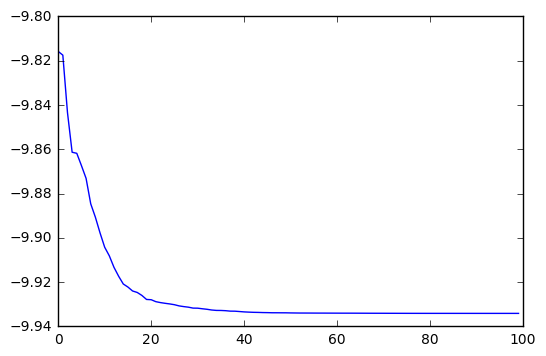

In [25]:
#[4, 2]
#theta_i = [1.5, 0.9] 
#theta_i = [4, 2]
#theta_i = [2, 0.5]
#theta_i = [-10, 12]
theta_i = [3, -1]
history, costs, grads, counter, epoch = sgd(x, y, theta_i, step=0.001)
print 'how many iters: ', len(costs)
print 'final total cost: ', costs[-1]
print 'precision to optimal params: ', np.linalg.norm(history[-1] - np.array([2.05384, 0]))
plt.plot(range(len(costs[-100:])), costs[-100:])

***YAY that also worked*** SGD takes more iterations to converge to where you want but each gradient update is faster. NOW TRY DIFFERENT INITIALIZATIONS AND STEPSIZES!!!